In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# functions

In [2]:
def get_targets(points,A):
    target = []
    for point in points:
        target.append(A[0] + A[1]*point + A[2]*point**2)
    return target

# datasets

In [3]:
train_data = np.random.uniform(-10,10,[1,100]).astype('float32')
test_data = np.random.uniform(-10,10,[1,100]).astype('float32')
train_data = train_data.reshape((100))
test_data = test_data.reshape((100))
train_data_sorted = np.sort(train_data,axis=0)
test_data_sorted = np.sort(test_data,axis=0)

In [4]:
A = [0, 0, 1]
train_targets = np.asarray(get_targets(train_data, A)).astype('float32')
test_targets = np.asarray(get_targets(test_data, A)).astype('float32')
train_targets_sorted = np.asarray(get_targets(train_data_sorted, A)).astype('float32')
test_targets_sorted = np.asarray(get_targets(test_data_sorted, A)).astype('float32')

In [5]:
print('train data:',train_data.shape)
print('train targets:',train_targets.shape)
print('test data:',test_data.shape)
print('train targets:',test_targets.shape)
print('test data sorted:',test_data_sorted.shape)
print('train targets sorted:',test_targets_sorted.shape)

train data: (100,)
train targets: (100,)
test data: (100,)
train targets: (100,)
test data sorted: (100,)
train targets sorted: (100,)


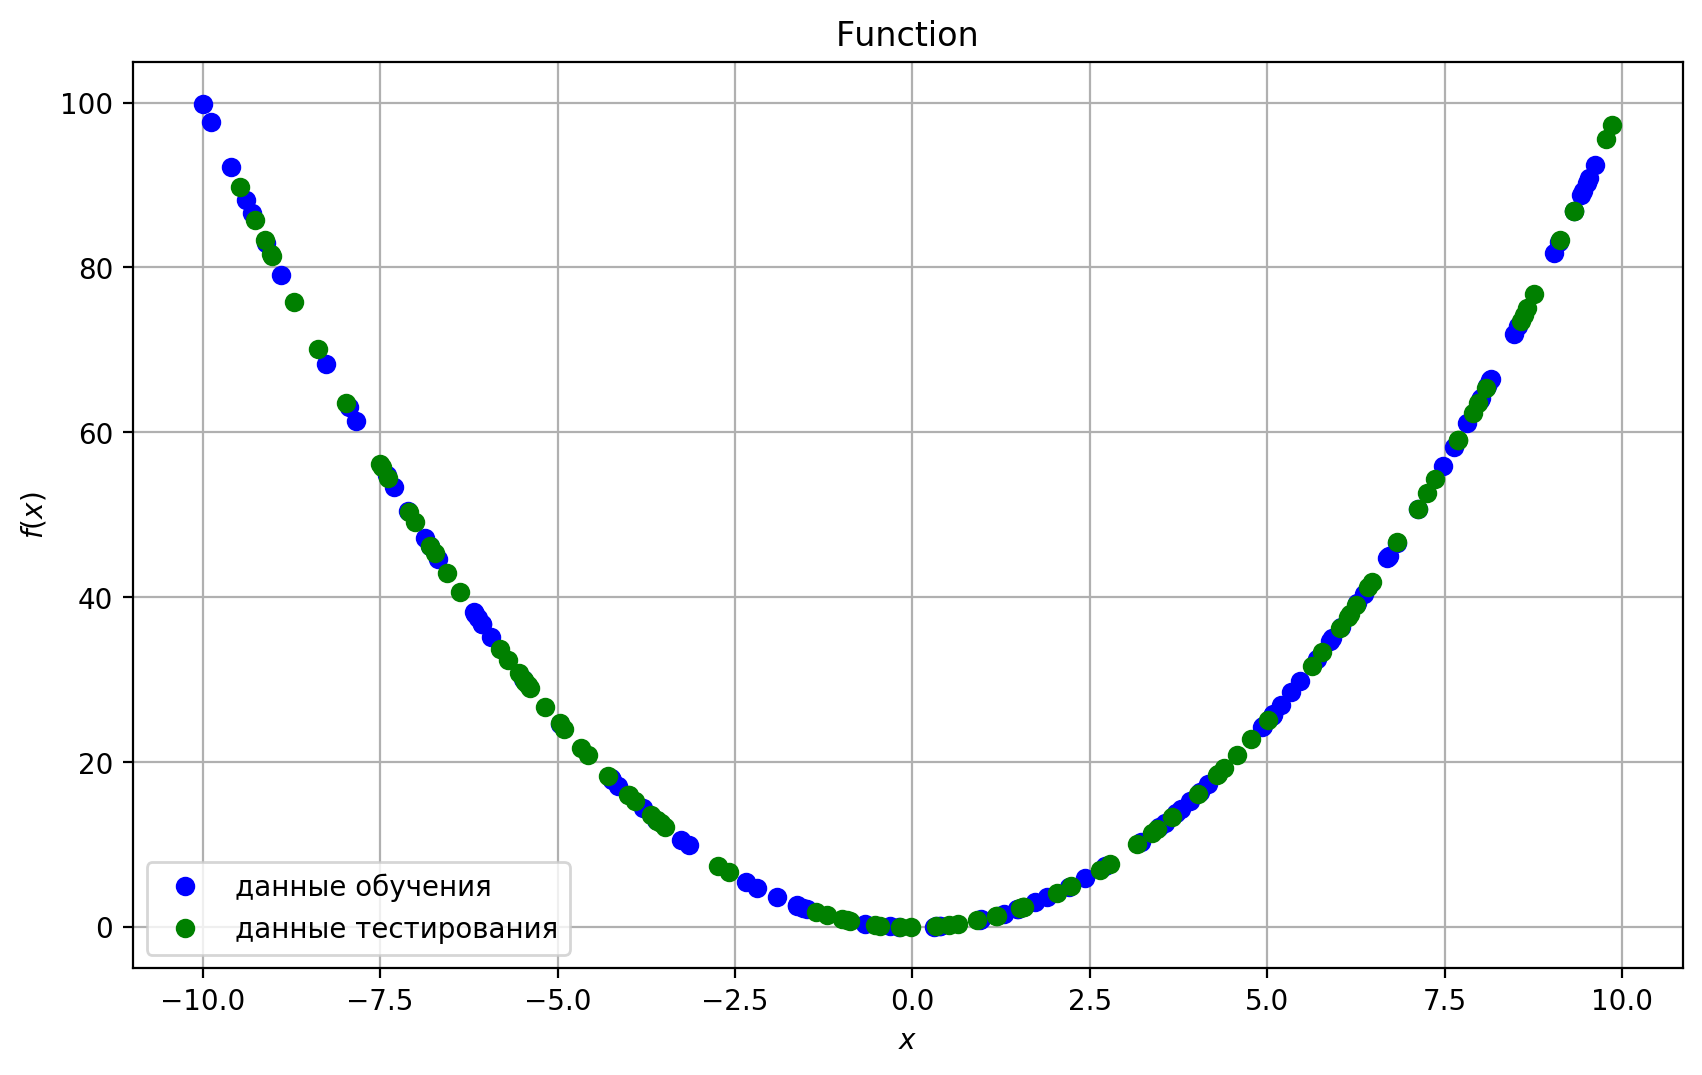

In [29]:
fig = plt.figure(figsize = (10,6), dpi = 200)
ax = fig.add_subplot(111)
ax.plot(train_data_sorted, train_targets_sorted, 'bo',linewidth = 1,label = 'данные обучения')
ax.plot(test_data_sorted, test_targets_sorted, 'go',linewidth = 1,label = 'данные тестирования')
plt.title('Function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.xticks(epochs)
plt.legend()
plt.grid()
plt.savefig("data.svg")
plt.show()

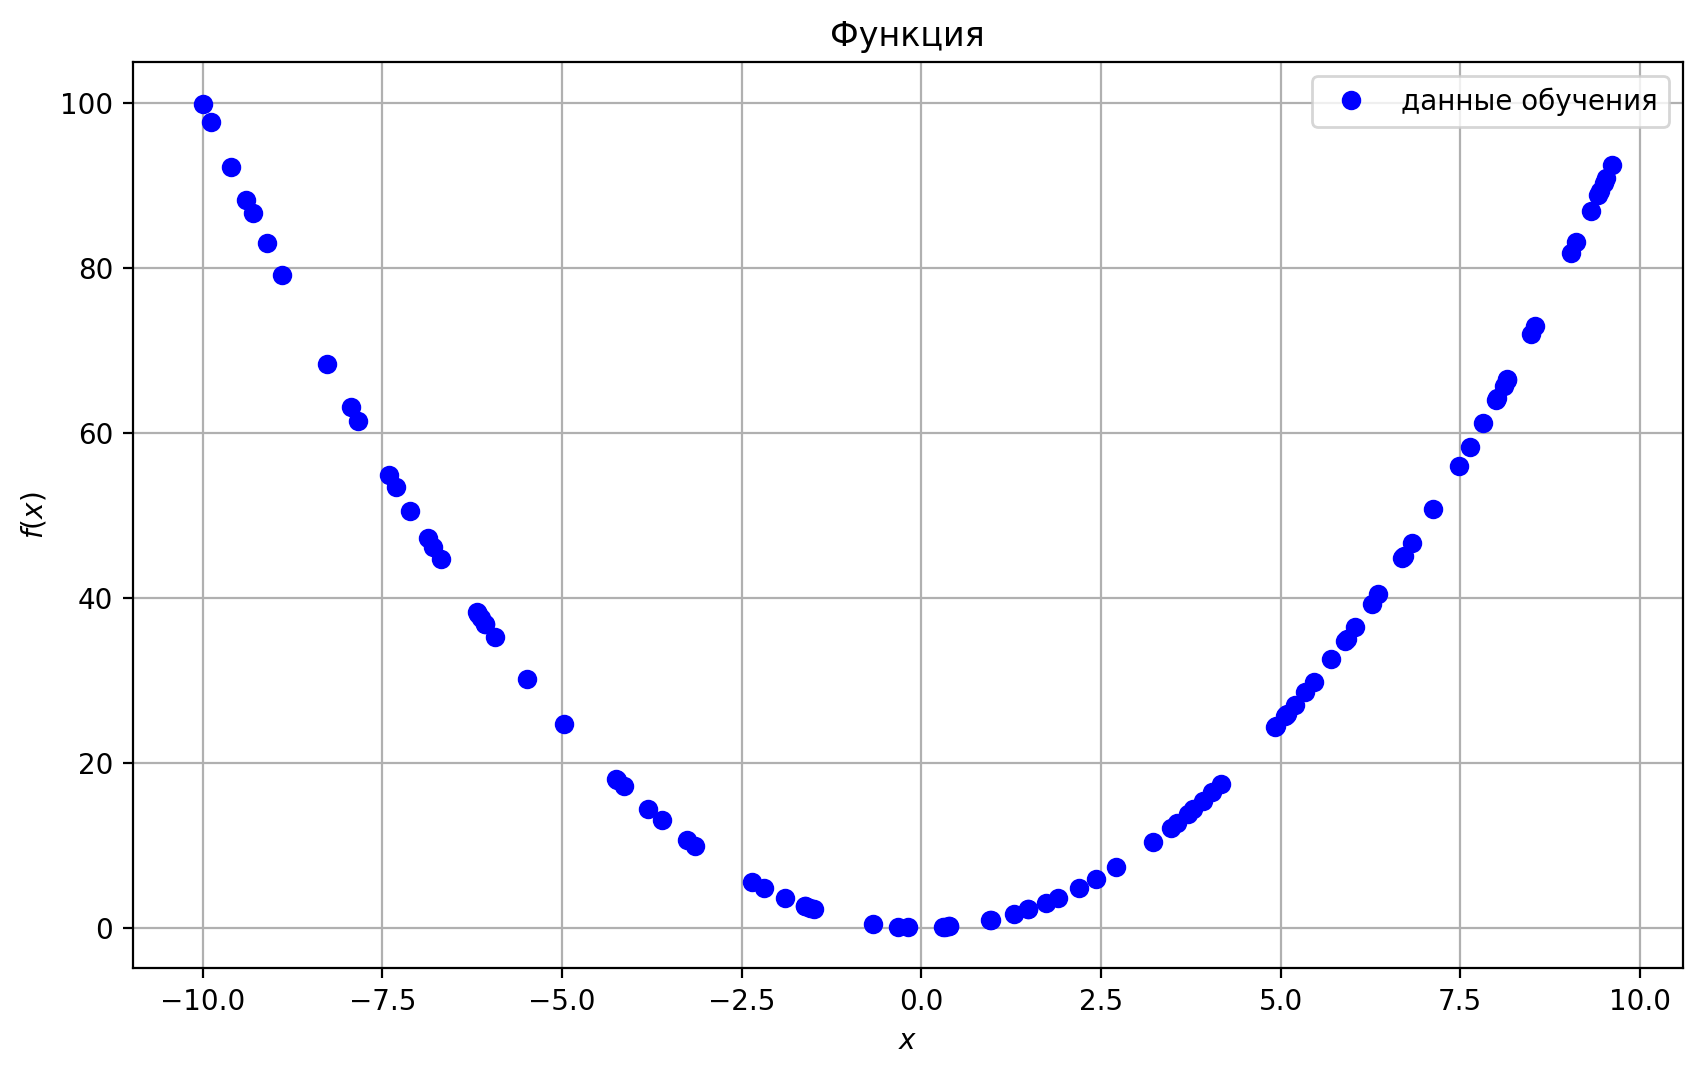

In [33]:
fig = plt.figure(figsize = (10,6), dpi = 200)
ax = fig.add_subplot(111)
ax.plot(train_data_sorted, train_targets_sorted, 'bo',linewidth = 1,label = 'данные обучения')
plt.title('Функция')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.xticks(epochs)
plt.legend()
plt.grid()
plt.savefig("training_data.svg")
plt.show()

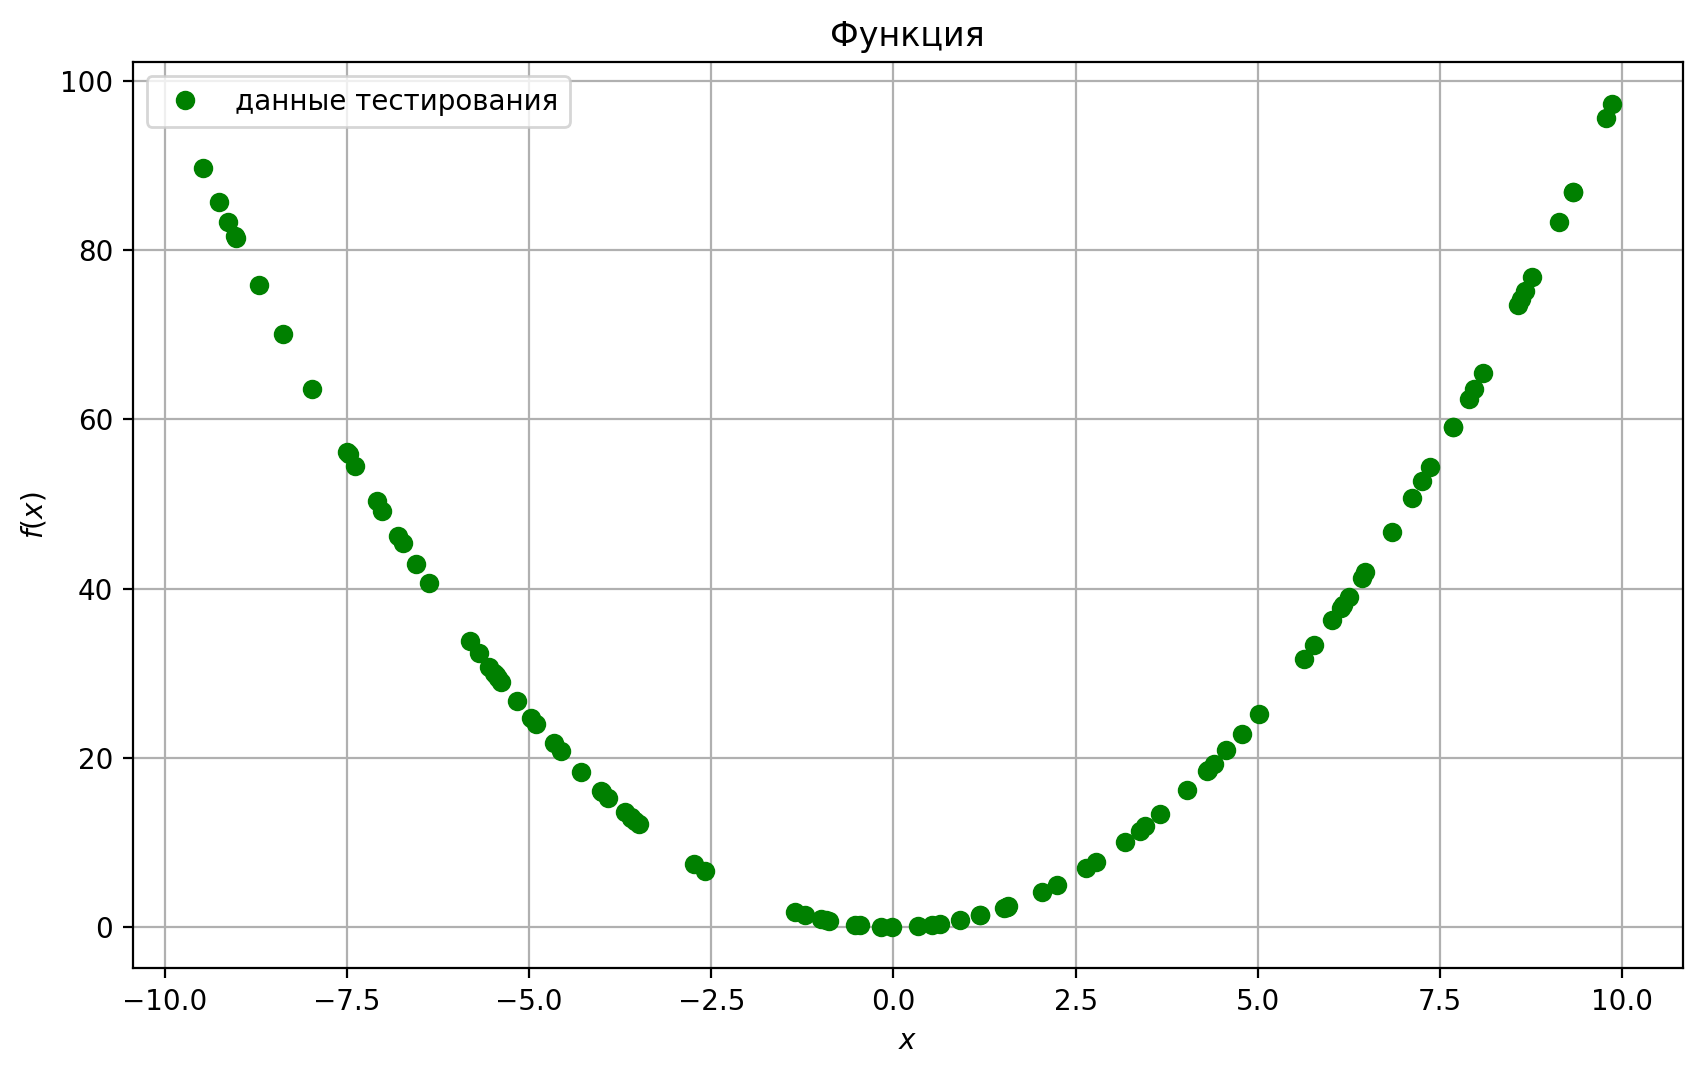

In [32]:
fig = plt.figure(figsize = (10,6), dpi = 200)
ax = fig.add_subplot(111)
ax.plot(test_data_sorted, test_targets_sorted, 'go',linewidth = 1,label = 'данные тестирования')
plt.title('Функция')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.xticks(epochs)
plt.legend()
plt.grid()
plt.savefig("testing_data.svg")
plt.show()

# netwok architecture

In [7]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(32, activation = 'relu', input_shape = (1,)))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

# no k-fold validation

In [8]:
'''num_epochs = 300
model = build_model()
history = model.fit(train_data, train_targets, validation_data = (test_data, test_targets),
                    epochs = num_epochs, batch_size = 1, verbose = 0)
mae_history = history.history['val_mae']   '''

"num_epochs = 300\nmodel = build_model()\nhistory = model.fit(train_data, train_targets, validation_data = (test_data, test_targets),\n                    epochs = num_epochs, batch_size = 1, verbose = 0)\nmae_history = history.history['val_mae']   "

In [9]:
'''epochs = range(1, len(mae_history) + 1)
fig = plt.figure(figsize = (10,6), dpi = 200)
ax = fig.add_subplot(111)
ax.plot(epochs,mae_history , 'b-',label = 'mae history on test set')
plt.title('validation mae')
plt.xlabel('epochs')
plt.ylabel('mae')
#plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()'''

"epochs = range(1, len(mae_history) + 1)\nfig = plt.figure(figsize = (10,6), dpi = 200)\nax = fig.add_subplot(111)\nax.plot(epochs,mae_history , 'b-',label = 'mae history on test set')\nplt.title('validation mae')\nplt.xlabel('epochs')\nplt.ylabel('mae')\n#plt.xticks(epochs)\nplt.legend()\nplt.grid()\nplt.show()"

# K-fold validation

In [10]:
k = 4
num_val_samples = len(train_data)//k # '//' means integer part
num_epochs = 300
all_scores = []

In [11]:
all_mae_histories = []
for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i*num_val_samples: (i + 1)* num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i + 1)* num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                        train_data[(i + 1)* num_val_samples:]], axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], 
                                           train_targets[(i + 1)* num_val_samples:]], axis = 0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets),  
                        epochs = num_epochs, batch_size = 1, verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
mean_mae_k_fold = np.mean(all_mae_histories,axis = 0)

# plotting the mean mae of the k-fold validation

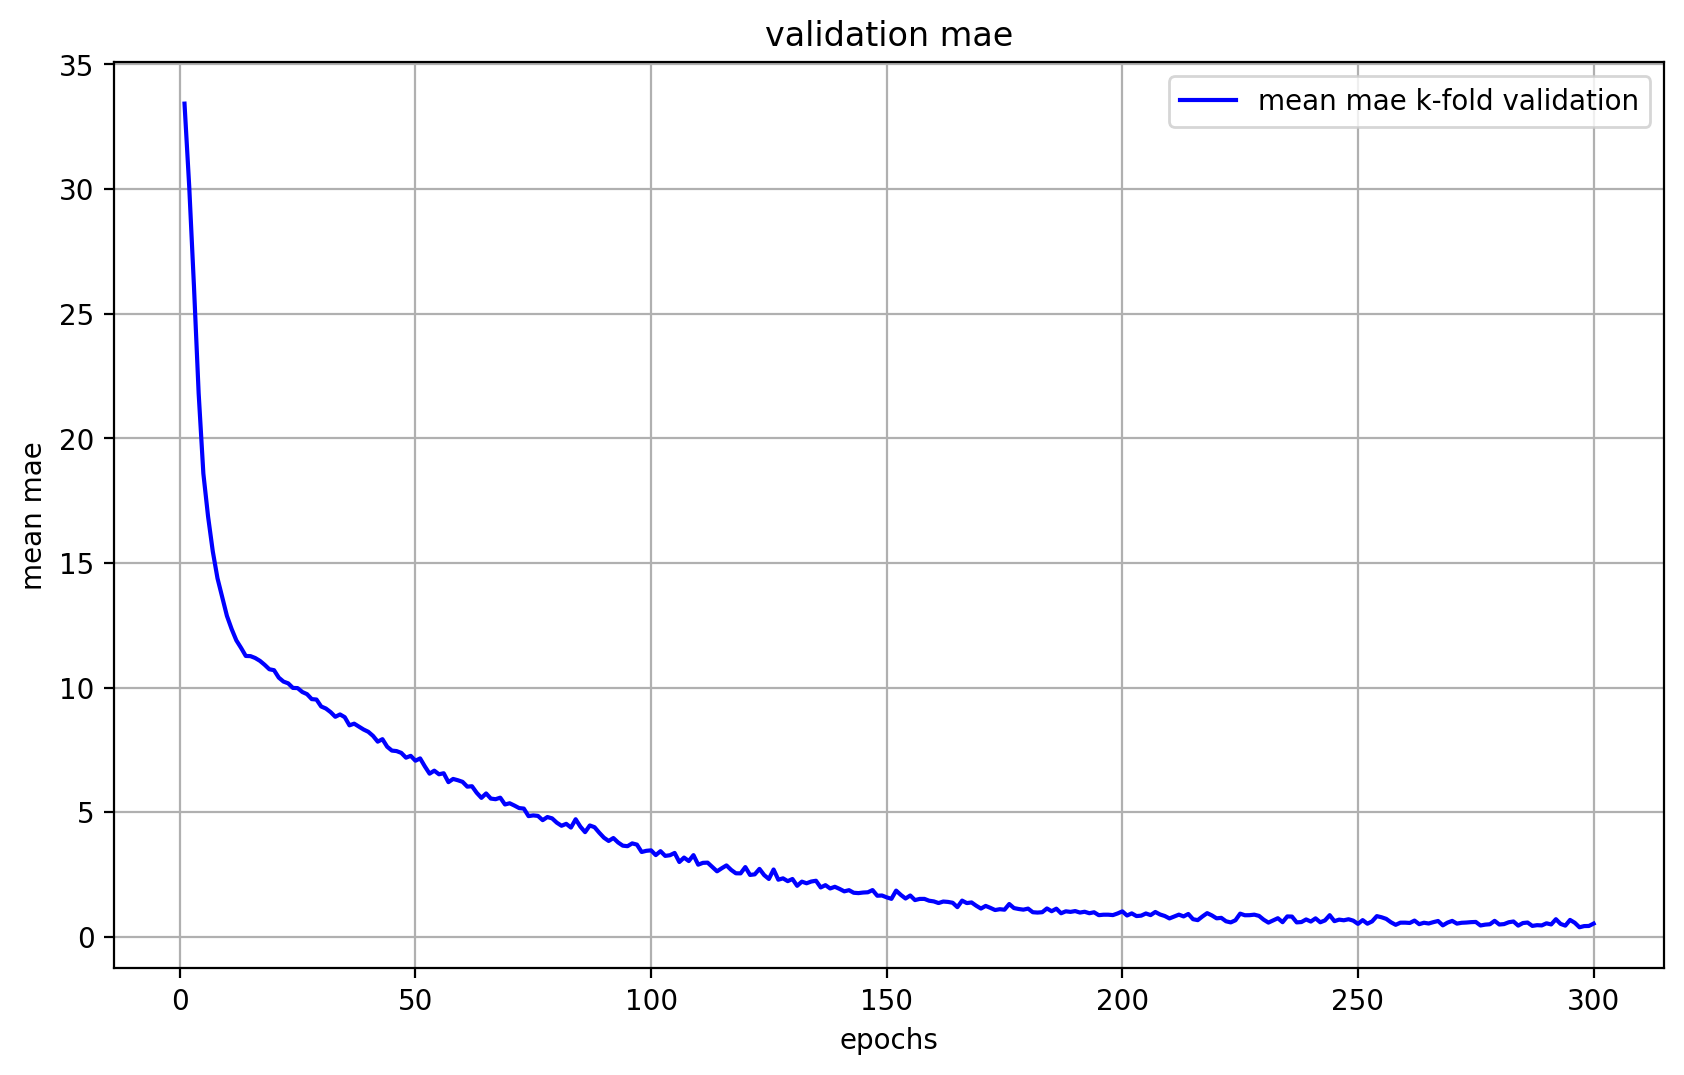

In [13]:
epochs = range(1, len(mean_mae_k_fold) + 1)
fig = plt.figure(figsize = (10,6), dpi = 200)
ax = fig.add_subplot(111)
ax.plot(epochs,mean_mae_k_fold, 'b-',label = 'mean mae k-fold validation')
plt.title('validation mae')
plt.xlabel('epochs')
plt.ylabel('mean mae')
#plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

# training the final model

In [14]:
model = build_model()
model.fit(train_data, train_targets, epochs = 200, batch_size = 1, verbose = 0)

In [15]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

100/100 [==============================] - 0s 545us/sample - loss: 3.1498 - mae: 1.3458
